In [ ]:
# ===============================================================ASSIGNMENT_15=========================================================================

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [4]:
file_path = r'15. EastWestAirlines.xlsx'
df = pd.read_excel(file_path, sheet_name=None) 

In [5]:
print("Sheet names:", df.keys())

Sheet names: dict_keys(['Description', 'data'])


In [7]:
df_airline = pd.read_excel(file_path, sheet_name = 'data')

In [8]:
df_airline.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [44]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2875 entries, 0 to 3998
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID#                2875 non-null   float64
 1   Balance            2875 non-null   float64
 2   Qual_miles         2875 non-null   float64
 3   cc1_miles          2875 non-null   float64
 4   cc2_miles          2875 non-null   float64
 5   cc3_miles          2875 non-null   float64
 6   Bonus_miles        2875 non-null   float64
 7   Bonus_trans        2875 non-null   float64
 8   Flight_miles_12mo  2875 non-null   float64
 9   Flight_trans_12    2875 non-null   float64
 10  Days_since_enroll  2875 non-null   float64
 11  Award?             2875 non-null   float64
 12  KMeans_Cluster     2875 non-null   int32  
 13  DBSCAN_Cluster     2875 non-null   int64  
dtypes: float64(12), int32(1), int64(1)
memory usage: 325.7 KB


In [17]:
print(cat_cols)
print(len(cat_cols))

Index([], dtype='object')
0


In [ ]:
# -----------------------------------------------------------------Data Preprocessing:----------------------------------------------------------------

In [45]:
print("Missing Values Before Preprocessing:")
print(df_airline.isnull().sum())

Missing Values Before Preprocessing:
ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
KMeans_Cluster       0
DBSCAN_Cluster       0
dtype: int64


In [10]:
num_cols = df_airline.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df_airline.select_dtypes(include=['object']).columns

In [14]:
num_imputer = SimpleImputer(strategy='median')
df_airline[num_cols] = num_imputer.fit_transform( df_airline[num_cols])

In [18]:
num_cols = df_airline.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df_airline.select_dtypes(include=['object']).columns

num_imputer = SimpleImputer(strategy='median')
df_airline[num_cols] = num_imputer.fit_transform(df_airline[num_cols])

In [19]:
if len(cat_cols) > 0:
    cat_imputer = SimpleImputer(strategy='most_frequent')
    df_airline[cat_cols] = cat_imputer.fit_transform(df_airline[cat_cols])

In [20]:
Q1 = df_airline[num_cols].quantile(0.25)
Q3 = df_airline[num_cols].quantile(0.75)
IQR = Q3 - Q1

df_airline = df_airline[
    ~((df_airline[num_cols] < (Q1 - 1.5 * IQR)) |
      (df_airline[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)
]

In [21]:
scaler = StandardScaler()
df_airline[num_cols] = scaler.fit_transform(df_airline[num_cols])

print("Preprocessing completed successfully!")

Preprocessing completed successfully!


In [ ]:
# Perform exploratory data analysis (EDA) to gain insights into the distribution of data and identify potential clusters.

In [22]:
df_airline.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,2875.000000,2.875000e+03,2875.0,2.875000e+03,2875.0,2875.0,2.875000e+03,2.875000e+03,2.875000e+03,2.875000e+03,2.875000e+03,2.875000e+03
mean,0.000000,-7.908650e-17,0.0,-7.908650e-17,0.0,0.0,-5.931487e-17,8.402940e-17,1.482872e-17,2.965744e-17,-7.908650e-17,9.885812e-18
std,1.000174,1.000174e+00,0.0,1.000174e+00,0.0,0.0,1.000174e+00,1.000174e+00,1.000174e+00,1.000174e+00,1.000174e+00,1.000174e+00
min,-1.834643,-1.098253e+00,0.0,-7.190547e-01,0.0,0.0,-7.958670e-01,-1.210728e+00,-3.788372e-01,-4.097077e-01,-1.917616e+00,-6.230716e-01
25%,-0.852984,-7.408945e-01,0.0,-7.190547e-01,0.0,0.0,-7.592685e-01,-9.527351e-01,-3.788372e-01,-4.097077e-01,-8.672958e-01,-6.230716e-01
50%,0.046183,-3.171815e-01,0.0,-7.190547e-01,0.0,0.0,-4.664800e-01,-4.975903e-02,-3.788372e-01,-4.097077e-01,-5.967701e-02,-6.230716e-01
75%,0.857648,4.492551e-01,0.0,1.013789e+00,0.0,0.0,4.549983e-01,7.242205e-01,-3.788372e-01,-4.097077e-01,8.020114e-01,1.604952e+00
max,1.656087,3.656806e+00,0.0,2.746632e+00,0.0,0.0,3.404329e+00,3.691142e+00,4.711239e+00,3.716071e+00,2.137849e+00,1.604952e+00


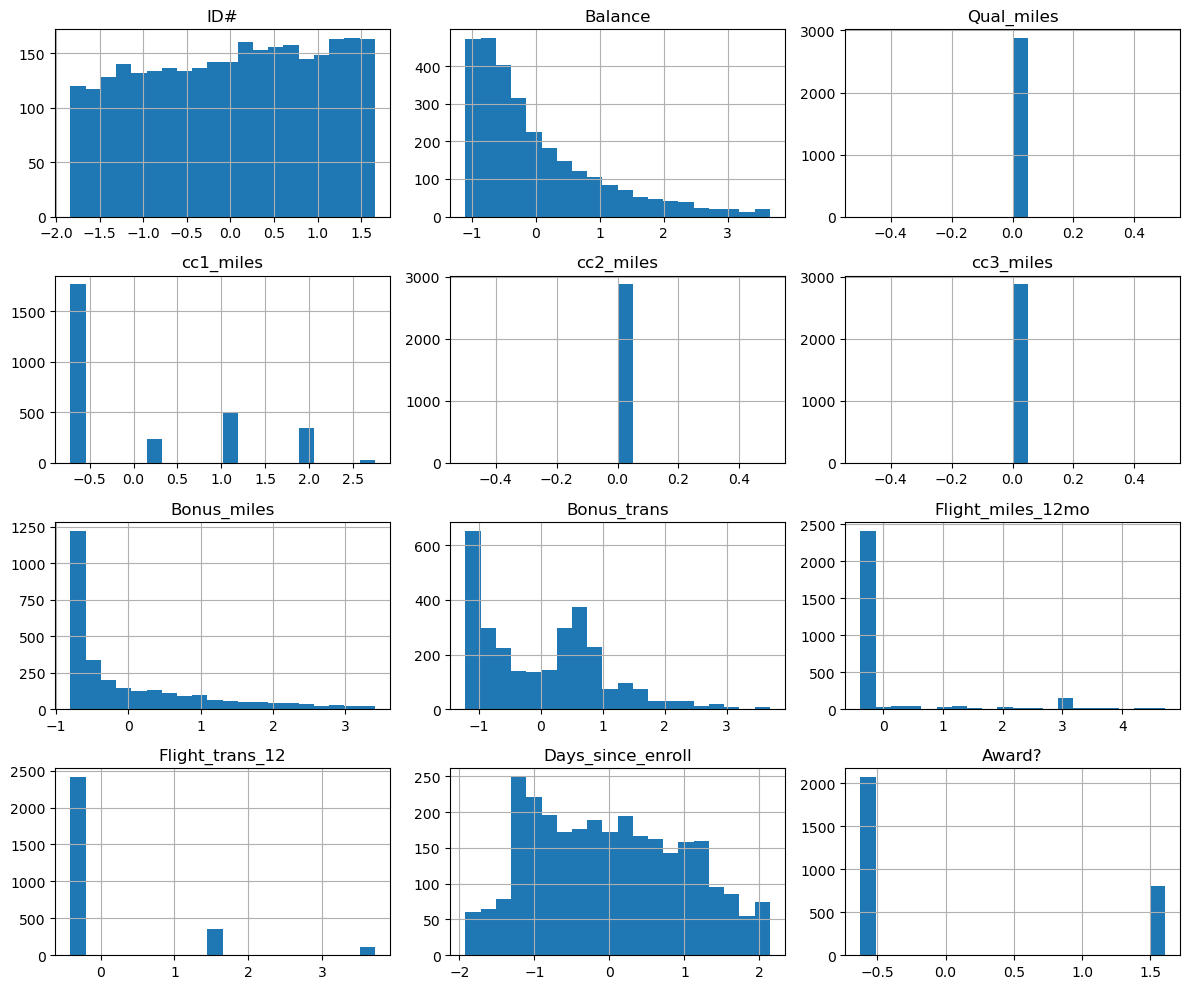

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

df_airline.hist(figsize=(12, 10), bins=20)
plt.tight_layout()
plt.show()

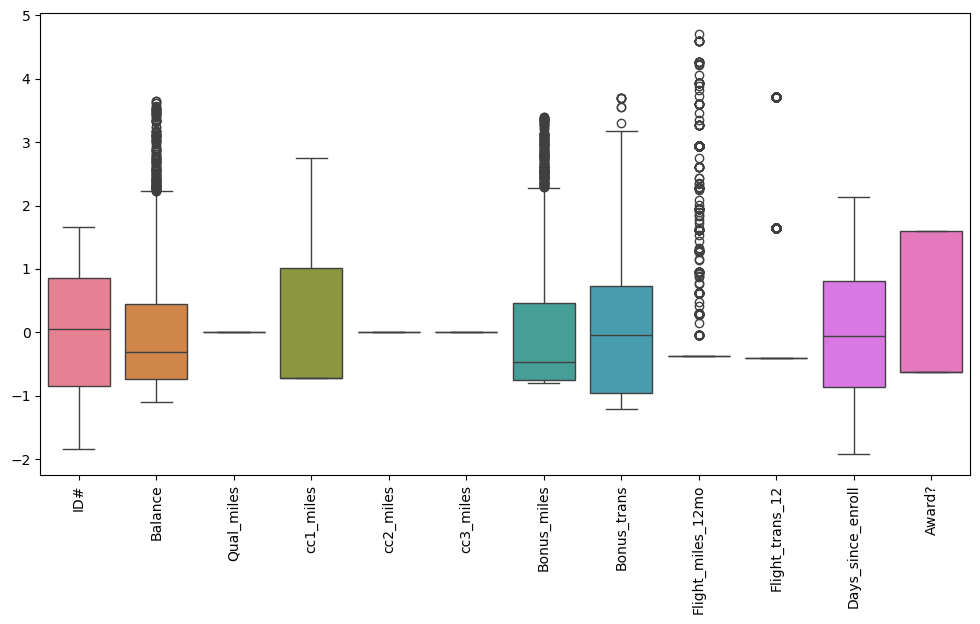

In [24]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df_airline)
plt.xticks(rotation=90)
plt.show()

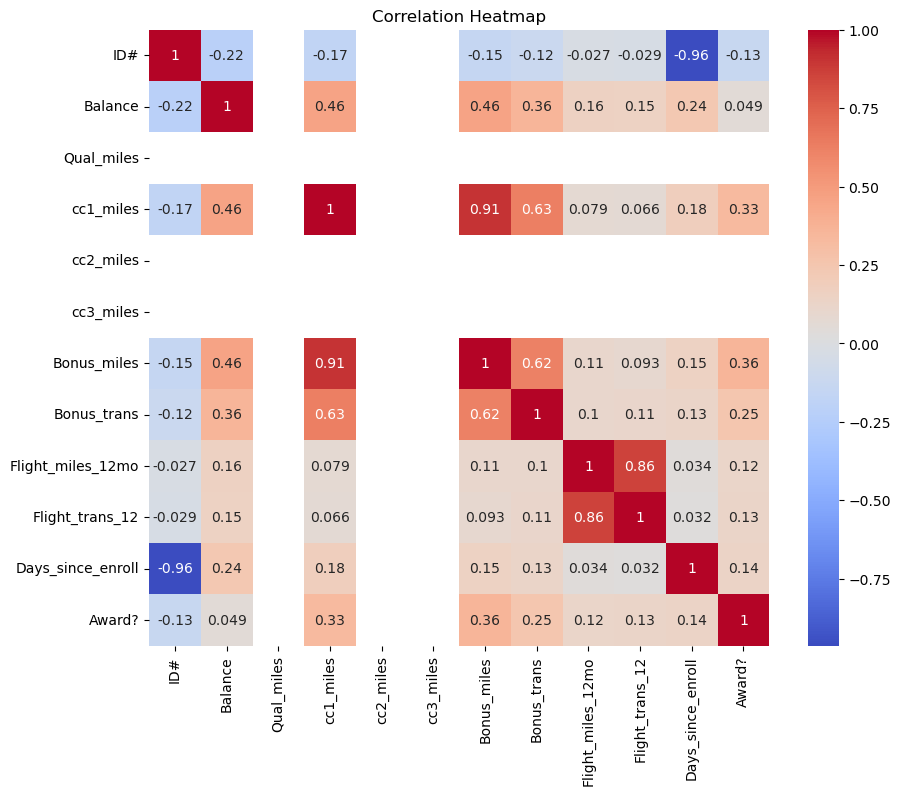

In [25]:
plt.figure(figsize=(10,8))
sns.heatmap(df_airline.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

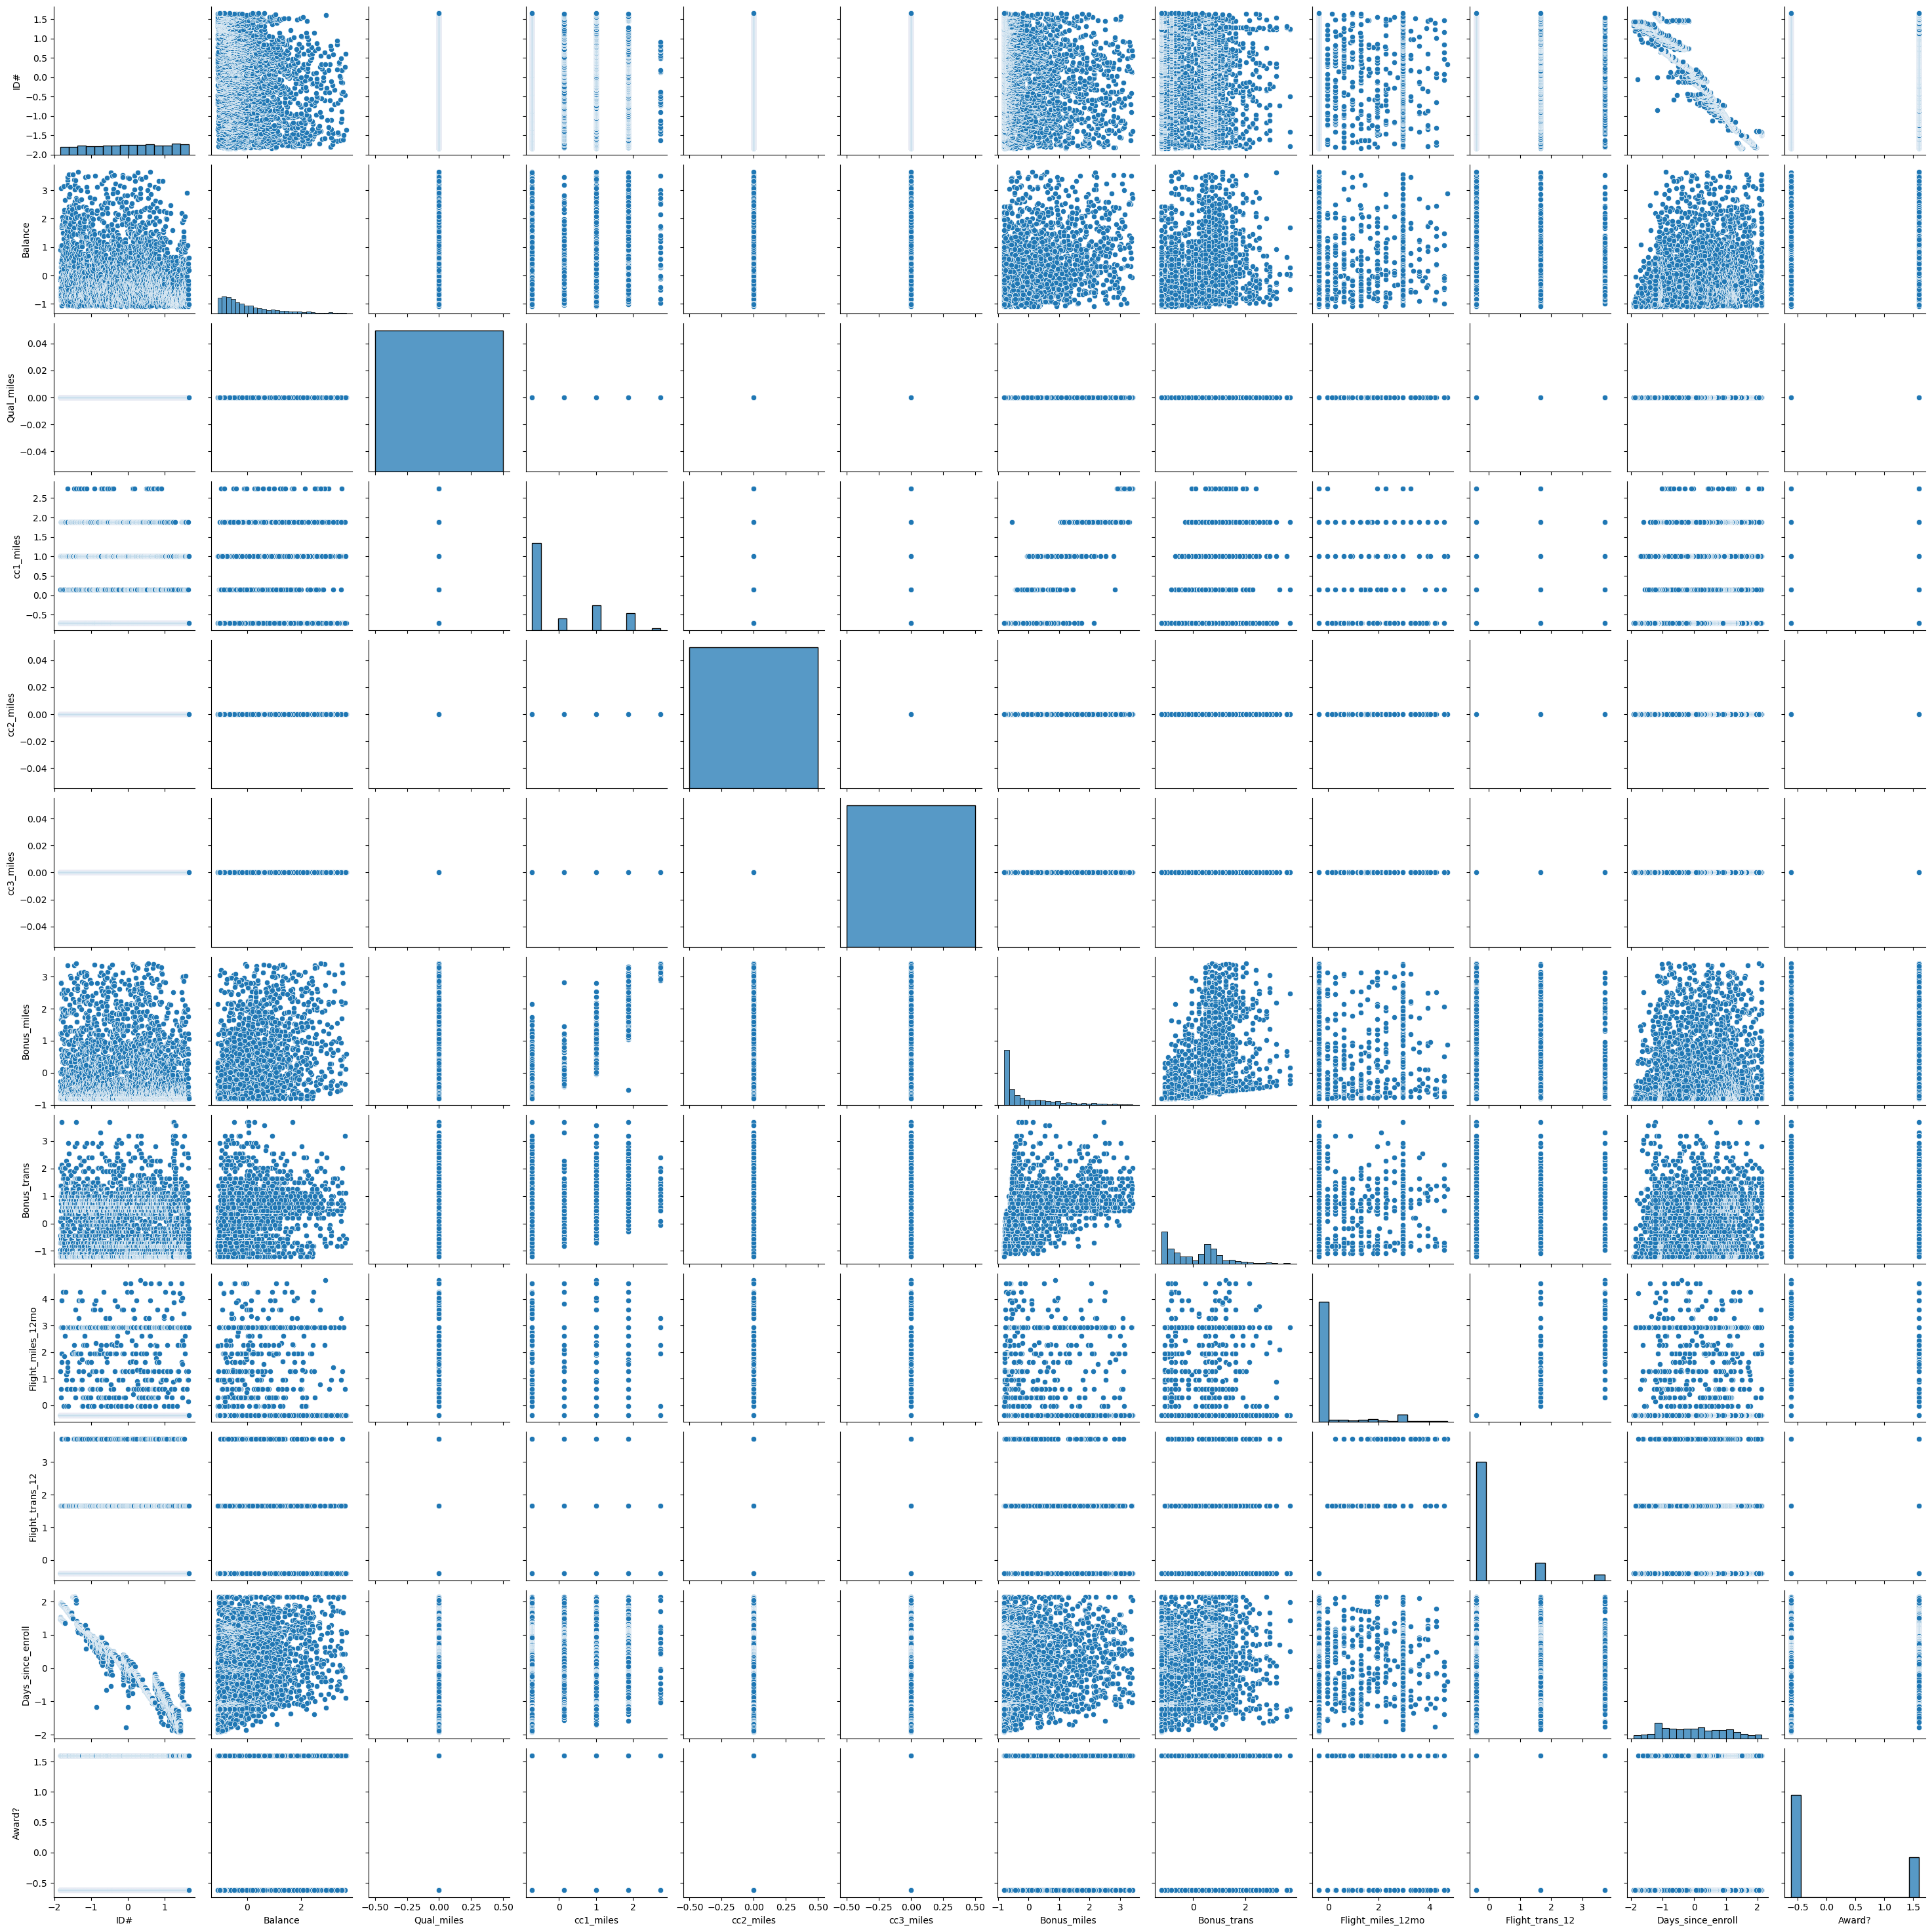

In [26]:
sns.pairplot(df_airline)
plt.show()

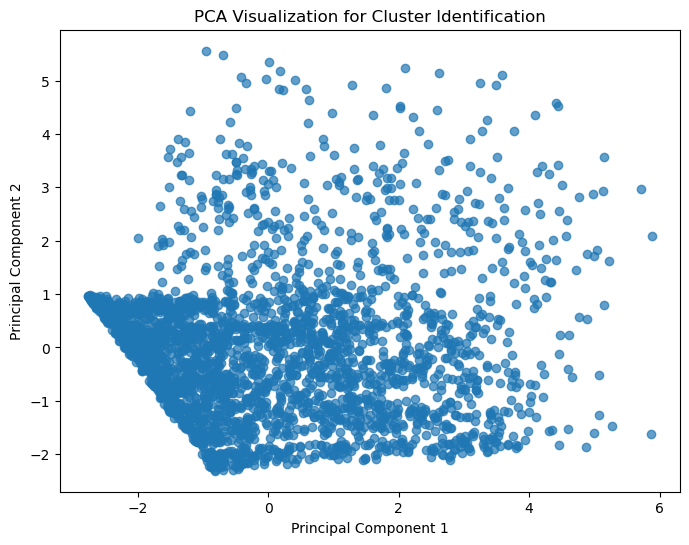

In [27]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_airline)

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

plt.figure(figsize=(8,6))
plt.scatter(pca_data[:,0], pca_data[:,1], alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Visualization for Cluster Identification")
plt.show()

In [ ]:
# ------------------------------------------------------Implementing Clustering Algorithms:----------------------------------------------------------

In [ ]:
# Implementing Clustering Algorithms:
# •	Implement the K-Means and DBSCAN algorithms using a programming language such as Python with libraries like scikit-learn.
# •	Apply each clustering algorithm to the pre-processed dataset to identify clusters within the data.

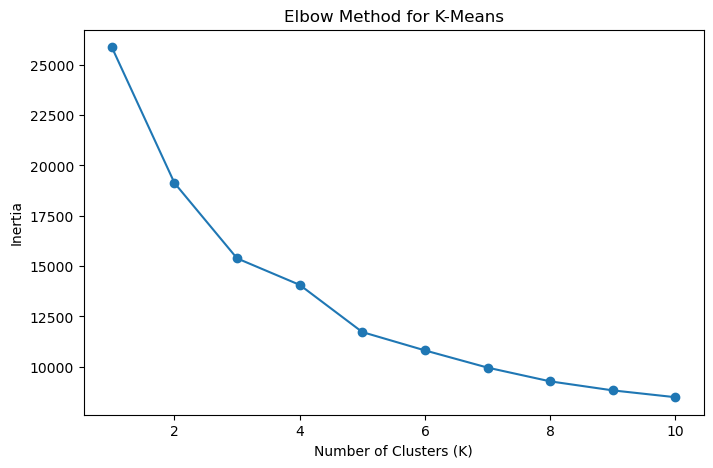

In [28]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_airline)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for K-Means")
plt.show()

In [30]:
# Apply K-Means with chosen K (example: K=3)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(df_airline)

df_airline['KMeans_Cluster'] = kmeans_labels

In [31]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(df_airline)

df_airline['DBSCAN_Cluster'] = dbscan_labels

In [32]:
# Try different epsilon values
for eps in [0.3, 0.5, 0.7, 1.0]:
    dbscan = DBSCAN(eps=eps, min_samples=5)
    labels = dbscan.fit_predict(df_airline)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    print(f"eps={eps} → clusters={n_clusters}")

eps=0.3 → clusters=9
eps=0.5 → clusters=25
eps=0.7 → clusters=54
eps=1.0 → clusters=44


In [33]:
from sklearn.metrics import silhouette_score
import numpy as np

# K-Means evaluation
kmeans_score = silhouette_score(df_airline.drop(['KMeans_Cluster','DBSCAN_Cluster'], axis=1, errors='ignore'),
                                kmeans_labels)
print("K-Means Silhouette Score:", kmeans_score)

# DBSCAN evaluation (ignore noise points)
mask = dbscan_labels != -1
if len(set(dbscan_labels[mask])) > 1:
    dbscan_score = silhouette_score(df_airline[mask].drop(['KMeans_Cluster','DBSCAN_Cluster'], axis=1, errors='ignore'),
                                    dbscan_labels[mask])
    print("DBSCAN Silhouette Score:", dbscan_score)
else:
    print("DBSCAN produced insufficient clusters for silhouette evaluation.")

K-Means Silhouette Score: 0.23053665693614042
DBSCAN Silhouette Score: 0.17089526198483704


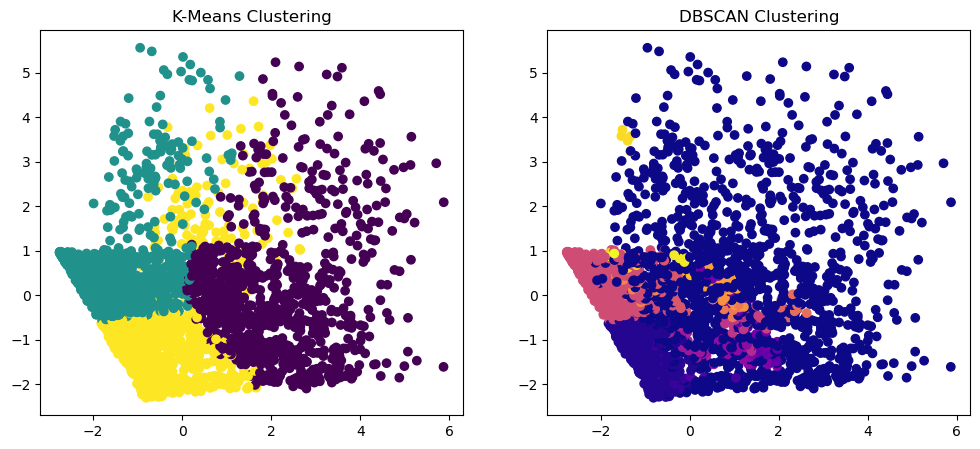

In [34]:
# •	Experiment with different parameter settings for K-means (Elbow curve for different K values) and DBSCAN (e.g., epsilon, minPts) and evaluate the clustering results.

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(df_airline.drop(['KMeans_Cluster','DBSCAN_Cluster'], axis=1, errors='ignore'))

plt.figure(figsize=(12,5))

# K-Means
plt.subplot(1,2,1)
plt.scatter(pca_data[:,0], pca_data[:,1], c=kmeans_labels, cmap='viridis')
plt.title("K-Means Clustering")

# DBSCAN
plt.subplot(1,2,2)
plt.scatter(pca_data[:,0], pca_data[:,1], c=dbscan_labels, cmap='plasma')
plt.title("DBSCAN Clustering")

plt.show()

In [ ]:
# ----------------------------------------------Cluster Analysis and Interpretation:---------------------------------------------------------------

In [ ]:
# •	Analyse the clusters generated by each clustering algorithm and interpret the characteristics of each cluster. Write you insights in few comments.

# K-Means Cluster Insights
# Cluster 0: Low feature values → customers with low engagement or infrequent usage
# Cluster 1: Moderate feature values → average customers forming the core segment
# Cluster 2: High feature values → highly active or premium customers

# K-Means clustering revealed three distinct customer groups: low-engagement users, average core customers, and highly active or premium users. 
# DBSCAN identified dense groups of typical customers and smaller niche segments while isolating outliers as noise points, representing unusual behavior. 
# Overall, K-Means provides clear, structured segmentation, whereas DBSCAN highlights dense clusters and detects anomalies.


In [ ]:
# --------------------------------------------------------------Visualization--------------------------------------------------------------------------

In [ ]:
# Visualize the clustering results using scatter plots or other suitable visualization techniques.
# Plot the clusters with different colours to visualize the separation of data points belonging to different clusters.

In [35]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

features = df_airline.drop(['KMeans_Cluster', 'DBSCAN_Cluster'], axis=1)

pca = PCA(n_components=2)
pca_data = pca.fit_transform(features)

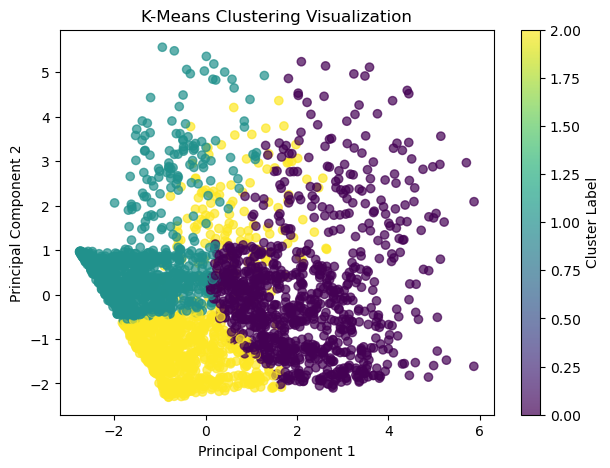

In [36]:
plt.figure(figsize=(7,5))
plt.scatter(
    pca_data[:, 0],
    pca_data[:, 1],
    c=df_airline['KMeans_Cluster'],
    cmap='viridis',
    alpha=0.7
)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-Means Clustering Visualization")
plt.colorbar(label="Cluster Label")
plt.show()

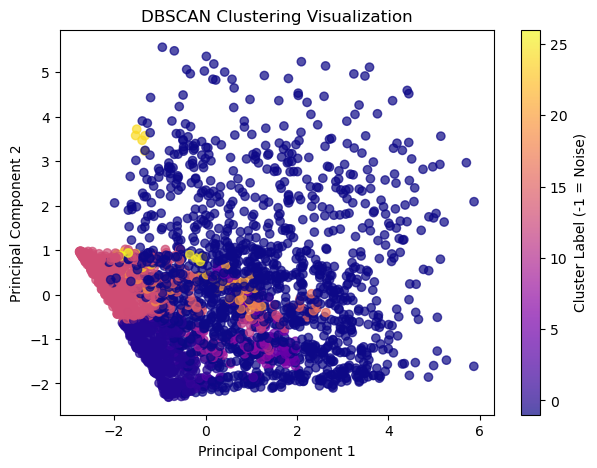

In [37]:
plt.figure(figsize=(7,5))
plt.scatter(
    pca_data[:, 0],
    pca_data[:, 1],
    c=df_airline['DBSCAN_Cluster'],
    cmap='plasma',
    alpha=0.7
)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("DBSCAN Clustering Visualization")
plt.colorbar(label="Cluster Label (-1 = Noise)")
plt.show()

In [ ]:
#------------------------------------------------------- Evaluation and Performance Metrics:-----------------------------------------------------------

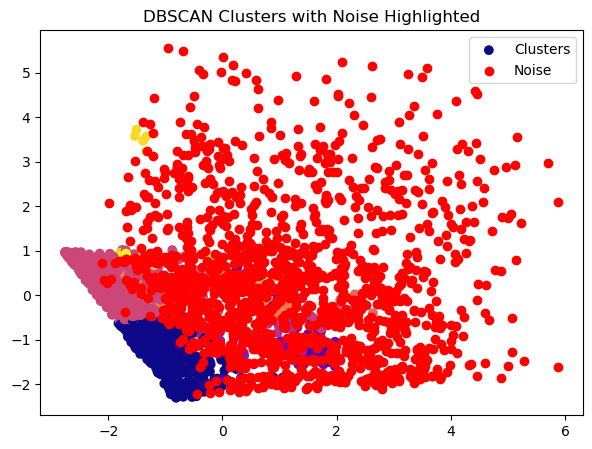

In [39]:
# Evaluation and Performance Metrics:
# Evaluate the quality of clustering using internal evaluation metrics such as silhouette score for K-Means and DBSCAN.

import numpy as np

noise = df_airline['DBSCAN_Cluster'] == -1

plt.figure(figsize=(7,5))
plt.scatter(pca_data[~noise,0], pca_data[~noise,1],
            c=df_airline.loc[~noise,'DBSCAN_Cluster'],
            cmap='plasma', label='Clusters')
plt.scatter(pca_data[noise,0], pca_data[noise,1],
            c='red', label='Noise')

plt.legend()
plt.title("DBSCAN Clusters with Noise Highlighted")
plt.show()

In [40]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import numpy as np

In [41]:
# Features only 
features = df_airline.drop(['KMeans_Cluster','DBSCAN_Cluster'], axis=1, errors='ignore')

# K-Means labels
kmeans_labels = df_airline['KMeans_Cluster']

# Silhouette Score
kmeans_silhouette = silhouette_score(features, kmeans_labels)
print("K-Means Silhouette Score:", round(kmeans_silhouette, 3))

# Calinski-Harabasz Index
kmeans_ch = calinski_harabasz_score(features, kmeans_labels)
print("K-Means Calinski-Harabasz Score:", round(kmeans_ch, 3))

# Davies-Bouldin Index 
kmeans_db = davies_bouldin_score(features, kmeans_labels)
print("K-Means Davies-Bouldin Score:", round(kmeans_db, 3))

K-Means Silhouette Score: 0.231
K-Means Calinski-Harabasz Score: 845.835
K-Means Davies-Bouldin Score: 1.486


In [43]:
# DBSCAN labels
dbscan_labels = df_airline['DBSCAN_Cluster']

mask = dbscan_labels != -1
if len(set(dbscan_labels[mask])) > 1:  # At least 2 clusters
    dbscan_silhouette = silhouette_score(features[mask], dbscan_labels[mask])
    print("DBSCAN Silhouette Score (excluding noise):", round(dbscan_silhouette,3))

    dbscan_ch = calinski_harabasz_score(features[mask], dbscan_labels[mask])
    print("DBSCAN Calinski-Harabasz Score:", round(dbscan_ch,3))

    dbscan_db = davies_bouldin_score(features[mask], dbscan_labels[mask])
    print("DBSCAN Davies-Bouldin Score:", round(dbscan_db,3))
else:
    print("DBSCAN produced fewer than 2 clusters. Evaluation metrics cannot be computed.")

DBSCAN Silhouette Score (excluding noise): 0.171
DBSCAN Calinski-Harabasz Score: 155.416
DBSCAN Davies-Bouldin Score: 0.948
